In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# <span style="color:red;"><center> TD - Tri par sélection et par insertion</span>

## 1. Implémentation des tris

### 1.1 Tri par sélection

**Fonction** tri_selection (tab)
> *tab est un tableau de n valeurs numériques qui est trié en place (tab est modifié mais la fonction ne retourne rien).*  
>
> *float* : mini  *# La valeur minimale trouvée*  
> *int* : i_mini *# L'indice de la valeur minimale trouvée*  
> n $\leftarrow$ taille(tab)  
> *# i correspond au premier indice du tableau restant à trier, quand i=n-2 le tableau à trier correspond aux 2 derniers éléments de tab*  
> **Pour** i allant de 0 à n-2 **faire**   
>> i_mini $\leftarrow$ i  *# On initialise avec le premier indice du tableau à trier.*  
>> mini $\leftarrow$ tab[i]  *# On initialise avec la première valeur du tableau à trier.*  
>> **Pour** j allant de i+1 à n-1 **faire**  *# On parcourt le reste du tableau à trier.*
>>> **Si** tab[j] < mini **alors**  *# Si on trouve une valeur plus petite on met à jour i_mini et mini.*  
>>>> i_mini $\leftarrow$ j  
>>>> mini $\leftarrow$ tab[j]  
>>
>> **Permuter** tab[i] et tab[i_mini]  *# On permute la première valeur du tableau non-trié avec le minimum trouvé*

**Q1. A partir du pseudo-code ci-dessus, implémenter l'algorithme de tri par sélection en Python.**

In [12]:
#Question 1
def tri_selection(tab):
    """tab est un tableau de n valeurs numériques qui peut être trié en place (tab est modifié mais la fonction ne retourne rien)
    ou pas (on crée une copie tabCopy de tab, on la trie et on renvoie [tabCopy, compt] où compt est le nombre d'itérations total)."""
    n=len(tab)
    compt=0
    tabCopy=list(tab) #à commenter pour un tri en place
    #tabCopy=tab # à décommenter pour un tri en place
    for i in range(n-1):
        i_mini=i
        mini=tabCopy[i]
        for j in range(i+1,n):
            if tabCopy[j]<mini :
                i_mini=j
                mini=tabCopy[j]
            compt=compt+1
            #print(compt)
        tabCopy[i],tabCopy[i_mini]=tabCopy[i_mini],tabCopy[i]
    return [tabCopy,compt] # à commenter pour un tri en place

**COMMENTAIRE :**
> Quand, dans le pseudo code, on a une boucle `Pour i allant de 0 à n-1 faire` cela se traduit en Python par `for i in range(n)`. De manière plus générale, `Pour i allant de deb à fin faire` se traduit par `for i in range(deb, fin+1)`.

### 1.2 Tri par insertion

**Fonction** tri_insertion (tab)
> *tab est un tableau de n valeurs numériques qui est trié en place (tab est modifié mais la fonction ne retourne rien).*  
>
> n $\leftarrow$ taille(tab)  
> *# i correspond au dernier indice du tableau déjà trié, quand i=n-2 il ne reste plus qu'à insérer au bon endroit le dernier élément du tableau, c'est donc bien la dernière itération.*  
> **Pour** i allant de 0 à n-2 **faire**   
>> j $\leftarrow$ i+1  *# j est l'indice de la valeur à insérer dans le tableau déjà trié.*  
>> **Tant que** j >0 **et** tab[j]<tab[j-1] **faire**  *# L'indice j de la valeur à insérer est décrémentée tant qu'on est pas au début du tableau et qu'on a pas trouvé une valeur supérieure à sa gauche.*
>>> **Permuter** tab[j] et tab[j-1]  *# On permute la valeur à insérer avec celle qui est à sa gauche.*  
>>> j $\leftarrow$ j-1  *# On décrémente j puisque la valeur à insérer est décalée d'un cran vers la gauche.*

**Q2. A partir du pseudo-code ci-dessus, implémenter l'algorithme de tri par insertion en Python.**

In [15]:
# Question 2
def tri_insertion(tab):
    """tab est un tableau de n valeurs numériques qui peut être trié en place (tab est modifié mais la fonction ne retourne rien)
    ou pas (on crée une copie tabCopy de tab, on la trie et on renvoie [tabCopy, compt] où compt est le nombre d'itérations total)."""
    n=len(tab)
    compt=0
    tabCopy=list(tab) #à commenter pour un tri en place
    #tabCopy=tab # à décommenter pour un tri en place
    for i in range (n-1):
        j=i+1
        while j>0 and tabCopy[j]<tabCopy[j-1]:
            tabCopy[j],tabCopy[j-1]=tabCopy[j-1],tabCopy[j]
            j=j-1
            compt=compt+1
            #print(compt)
    return [tabCopy,compt] # à commenter pour un tri en place

**COMMENTAIRE :**

>Quand, dans le pseudo code, on a une boucle `Pour i allant de 0 à n-1 faire` cela se traduit en Python par `for i in range(n)`. De manière plus générale, `Pour i allant de deb à fin faire` se traduit par `for i in range(deb, fin+1)`.

### 1.3 Test des tris

**Utiliser le code ci-dessous pour tester vos algorithmes de tri sur une liste d'entiers aléatoires.** On pourra faire varier la taille $N$ de la liste et les bornes inférieures et supérieures `valMin` et `valMax` des valeurs aléatoires et on utlisera **les 2 algorithmes de tri** précédents (ligne à décommenter). Dans tous les cas, **on vérifiera juste que les liste affichées après le tri sont bien triées par ordre croissant**.

In [16]:
from random import randint
#Création d'une Liste de N entiers aléatoires tirés entre valMin et valMax
N=10
valMin=0
valMax=10
L = [randint(valMin,valMax) for i in range(N)]

#Affichage de la liste aléatoire et du résultat du tri
print('Liste de départ :',L)
tri_selection(L)
#tri_insertion(L) #Décommenter cette ligne et commenter la ligne du dessus pour tester tri_insertion
print('Liste triée :',L)

Liste de départ : [4, 1, 7, 7, 5, 8, 3, 1, 5, 4]
Liste triée : [4, 1, 7, 7, 5, 8, 3, 1, 5, 4]


**COMMENTAIRE :**

> Le code ci-dessous ne fonctionne plus (les listes ne sont pas triées) une fois que les fonctions ont été modifiées pour ne plus faire de tri en place. C'est parfaitement normal !

Le fait de trier les liste **en place** complique un peu les tests. En effet, si je lance les deux tris à la suite sur la même liste, le deuxième tri s'effectuera sur une liste déjà triée. Je ne pourrai donc **pas comparer les deux algorithmes**. C'est pour cela que dans le code précédent, on ne peut activer qu'un algorithme de tri à la fois en commentant/décommentant.

Afin de vérifier que le tri par insertion a une complexité moindre que le tri par sélection, on peut dans un premier temps ajouté dans leurs algorithme un compteur d'itération que l'on incrémente de 1, à chaque fois que l'on passe dans la deuxième boucle.

**Q3. Modifier vos fonctions `tri_selection(tab)` et `tri_insertion(tab)` afin qu'elles retournent une liste de la forme [liste triée, nbIter], sans modifier la liste passée en argument.  Puis tester les algorithmes modifiés avec le code à compléter ci-dessous.**

In [25]:
# Question 3
from random import randint
#Création d'une Liste de N entiers aléatoires tirés entre valMin et valMax
N=10
valMin=0
valMax=10
L = [randint(valMin,valMax) for i in range(N)]

#Affichage de la liste aléatoire et du résultat du tri
print('Liste de départ :', L)
L1=tri_selection(L)
L2=tri_insertion(L)
print('Liste triée par sélection :', L1[0], "Nombre d'itérations ", L1[1]) #Ligne à compléter
print('Liste triée par insertion :', L2[0], "Nombre d'itérations ", L2[1]) #Ligne à compléter
print("Liste initiale :", L)

Liste de départ : [5, 10, 5, 6, 8, 3, 8, 9, 3, 2]
Liste triée par sélection : [2, 3, 3, 5, 5, 6, 8, 8, 9, 10] Nombre d'itérations  45
Liste triée par insertion : [2, 3, 3, 5, 5, 6, 8, 8, 9, 10] Nombre d'itérations  26
Liste initiale : [5, 10, 5, 6, 8, 3, 8, 9, 3, 2]


**COMMENTAIRES :**

> Cette fois, on affecte les résultats renvoyés par les fonctions de tri aux variables L1 et L2 qu'on affiche ensuite. On peut vérifier en l'affichant à la fin que la liste L de départ n'a pas été modifiée.  
> En faisant plusieurs essais, on constate que que le **tri par insertion utilise systématiquement moins d'itérations pour effectuer le tri**. En moyenne, il en fait 2 fois moins.

## 2. Mesures de complexité

### 2.1 Comparaison des algorithmes

On utilise la commande `timeit` pour comparer le temps d'exécution des tris pas insertion et par sélection, ainsi que le tri intégré dans Python (fonction `sorted`) qui est basée sur l'algorithme *timsort* (association du tri fusion et du tri par insertion).

**Remarque importante :**

En moyenne, le **tri par insertion devrait être environ 2 fois plus rapide que le tri par sélection** mais ce n'est probablement pas ce que vous allez observer. Il se pourrait même que la mesure donne une durée plus longue pour le tri par insertion que pour le tri par sélection.  
Ceci montre que la réalité est toujours plus complexe que la théorie. En effet, même s'il fait moins d'itérations, un algorithme peut être plus long à s'exécuter si les opérations élémentaires exécutées lors d'une itération sont plus longues. Justement parce qu'en fait, ce ne sont **pas vraiment des opérations élémentaires** !

In [19]:
from timeit import Timer

#Création d'une Liste de N entiers aléatoires tirés entre valMin et valMax
N=1000
valMin=0
valMax=N
L = [randint(valMin,valMax) for i in range(N)]

print("Durée d'exécution pour le tri par sélection :")
%timeit tri_selection(L)
print("Durée d'exécution pour tri par insertion :")
%timeit tri_insertion(L)
print("Durée d'exécution pour timsort :")
%timeit sorted(L)

Durée d'exécution pour le tri par sélection :
64 ms ± 1.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Durée d'exécution pour tri par insertion :
96.9 ms ± 7.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Durée d'exécution pour timsort :
112 µs ± 4.65 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**COMMENTAIRE :**

> Si `timsort`est environ **1000 fois plus rapide que nos 2 algorithmes de tri**, le **tri par insertion est plus lent que tri par sélection**. Ceci est **surprenant** car, comme on le verra après, il utilise un **plus petit nombre d'itérations**.

### 2.2 Pire et meilleur des cas

Le tri par sélection fonctionne de la même façon quelle que soit la liste fournie en entrée. Par contre, nous avons vu que que **le fonctionnement du tri par insertion pouvait varier selon les cas**. La comparaison précédente donne-t-elle le même résultat dans le pire et le meilleur cas pour le tri par insertion ?

**En théorie**, les 2 algorithmes sont **équivalents dans le pire des cas** mais le **tri par insertion devient linéaire** et donc beaucoup plus rapide que le tri par sélection **dans le meilleur des cas**.

**Q4. Dans le programme précédent, modifier la liste L fournie en entrée afin de renouveler la comparaison, mais cette fois dans le pire et le meilleur des cas (pour l'agorithme de tri par insertion).**

In [24]:
# Question 4
N=1000
#Création d'une Liste de N entiers dans le pire des cas
L = sorted([randint(0,N) for i in range(N)], reverse=True) #liste triée par ordre décroissant

print("PIRE DES CAS :")
print("Durée d'exécution pour le tri par sélection :")
%timeit tri_selection(L)
print("Durée d'exécution pour tri par insertion :")
%timeit tri_insertion(L)
print("Durée d'exécution pour timsort :")
%timeit sorted(L)

#Création d'une Liste de N entiers dans le meilleur des cas
L = sorted([randint(0,N) for i in range(N)])#liste déjà triée

print("MEILLEUR DES CAS :")
print("Durée d'exécution pour le tri par sélection :")
%timeit tri_selection(L)
print("Durée d'exécution pour tri par insertion :")
%timeit tri_insertion(L)
print("Durée d'exécution pour timsort :")
%timeit sorted(L)

PIRE DES CAS :
Durée d'exécution pour le tri par sélection :
57.9 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Durée d'exécution pour tri par insertion :
148 ms ± 4.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Durée d'exécution pour timsort :
39.8 µs ± 1.19 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
MEILLEUR DES CAS :
Durée d'exécution pour le tri par sélection :
46.9 ms ± 2.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Durée d'exécution pour tri par insertion :
168 µs ± 7.95 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Durée d'exécution pour timsort :
8.28 µs ± 692 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


**COMMENTAIRES :**

> Dans le **pire des cas (liste initiale triée par ordre décroissant)**, les tris par sélection et par insertion sont **normalement équivalents** car ils font le **même nombre d'itérations**, mais on observe ici que le **tri par insertion s'avère environ 3 fois plus lent**.  
> Ceci est cohérent avec les résultats précédents puisqu'en moyenne il devrait être 2 fois plus rapide. Or nos mesures l'avait donné (question 2.1) environ 1,5 fois plus lent. Pour résumer, le **tri par insertion fait donc 2 fois moins d'itérations en moyenne mais comme chaque itération est 3 fois plus longue, cela le rend bien 1,5 fois plus lent**.  
> Dans tous les cas, **l'algorithme de tri intégré dans Python reste bien plus rapide**.

### 2.3 Vérification de la complexité

On veut vérifier que la **complexité moyenne des algorithmes de tri par sélection et insertion sont quadratiques** et la comparer à celle du tri intégré dans Python.

Le code ci-dessous permet de tracer les **courbes donnant le temps d'exécution des 3 algorithmes de tri en fonction de la taille n du tableau à trier**. Une courbe de modélisation quadratique est ajoutée pour les tris par sélection et insertion.

**ATTENTION :**

Si le comportement quadratique se voit très bien, par contre, pour les raisons expliquées plus haut, ce programme ne donne pas les résultats attendus en terme de comparaison.

**Q5. Après l'avoir testé tel quel, modifier le programme ci-dessous pour utiliser le nombre d'itérations en ordonnée au lieu de la durée d'exécution. En bonus, on pourra regarder ce que l'on obtient dans le pire et le meilleur des cas.**

N =  1000
N =  2000
N =  3000
N =  4000
N =  5000
N =  6000
N =  7000
N =  8000
N =  9000
N =  10000
Modele 1 : y = 5.00E-01*N²
Modele 2 : y = 5.00E-01*N²


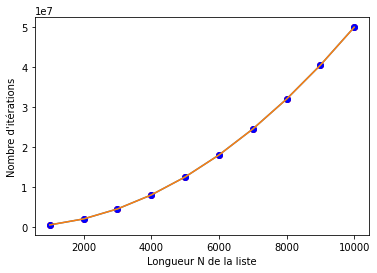

In [33]:
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

def quadratique (x,a): # fonction quadratique de la forme y=f(a*x²)
    return a*x*x

# Faire une boucle sur les valeurs de n pour calculer les temps d'exécution sur chacun des 2 algorithme
# La liste abscisse contiendra les valeurs de n, les listes ordonnee1, ordonnee2 et ordonnee3 contiendront les temps
# d'exécution des 3 algorihtmes. 
abscisse=[]
ordonnee1=[]
ordonnee2=[]
ordonnee3=[]
modele1=[]
modele2=[]

Nbessai=1
Nbrepet=1
inc=1000
debut=1000
fin=11000
for N in range(debut,fin,inc): # la taille N du tableau varie de debut à fin par pas de inc
    print('N = ',N)
    abscisse.append(N) # N sera en abscisse
    nbiter1=0
    nbiter2=0
    for i in range(Nbrepet):
#        L=sorted([randint(0,N) for k in range(N)]) # meilleur cas
        L=sorted([randint(0,N) for k in range(N)], reverse=True) # pire cas
#        L=[randint(0,N) for k in range(N)] # cas moyen
        L1=tri_selection(L)
        nbiter1=nbiter1+L1[1]
        L2=tri_insertion(L)
        nbiter2=nbiter2+L2[1]
    ordonnee1.append(nbiter1/Nbrepet)
    ordonnee2.append(nbiter2/Nbrepet)
 
#    t1 = Timer("tri_selection(L)", globals=globals()) # on crée un timer pour tri_selection
#    ordonnee1.append(min(t1.repeat(Nbessai,Nbrepet))) # on ajoute à ordonnée 1 le temps minimum sur Nbessai essais de Nbrepet recherches
#    t2 = Timer("tri_insertion(L)", globals=globals()) # on crée un timer pour tri_insertion
#    ordonnee2.append(min(t2.repeat(Nbessai,Nbrepet))) # on ajoute à ordonnée 2 le temps minimum sur Nbessai essais de Nbrepet recherches
#    t3 = Timer("sorted(L)", globals=globals()) # on crée un timer pour sorted
#    ordonnee3.append(min(t3.repeat(Nbessai,Nbrepet))) # on ajoute à ordonnée 2 le temps minimum sur Nbessai essais de Nbrepet recherches

#calcul des paramètres de modélisation pour ordonnee1 et ordonnee2
parametres1, covariance = curve_fit(quadratique, abscisse, ordonnee1) 
parametres2, covariance = curve_fit(quadratique, abscisse, ordonnee2)

for i in range(len(abscisse)) : #construction des ordonnées pour les 2 modèles
    modele1.append(quadratique(abscisse[i],*parametres1))
    modele2.append(quadratique(abscisse[i],*parametres2))
    
# courbes pour les modèles avec légende    
plt.plot(abscisse,modele1)
plt.plot(abscisse,modele2)
print('Modele 1 : y = {:.2E}*N²'.format(*parametres1))
print('Modele 2 : y = {:.2E}*N²'.format(*parametres2))

# nom des axes    
plt.xlabel('Longueur N de la liste')
plt.ylabel("Nombre d'itérations")
# definition des courbes
plt.scatter(abscisse,ordonnee1,color='red')
plt.scatter(abscisse,ordonnee2,color='blue')
#plt.scatter(abscisse,ordonnee3,color='green')
#tracé du graphique
plt.show()

**COMMENTAIRES :**

> **Sans modifier le code**, avec un nombre d'essais `Nbessai = 5` et nombre de répétitions `Nbrepet = 10`, on obtient ceci :
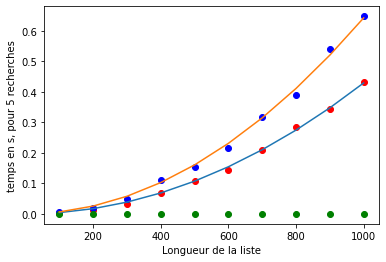
Les **points verts** correspondent au **tri intégré à Python** et on voit bien qu'il reste **toujours bien plus rapide que les tris par insertion et sélection**.  
Concernant ces derniers, on retrouve les résultats précédents avec, contrairement à ce qui était attendu, un **tri par insertion (en bleu) plus lent que le tri par sélection (en rouge)**. Par contre, la **modélisation quadratique** (courbes bleu clair et orange) donne **d'excellents résultats dans les 2 cas**, confirmant la **complexité quadratique** de ces algorithmes. On retrouve aussi le fait que le **tri par insertion se montre 1,5 fois plus lent que le tri par sélection** en **comparant les coefficients de la modélisation** ($6,43/4,3 \approx 1.5$).  
>
> En **modifiant le code pour utiliser le nombre d'itérations** au lieu du temps d'exécution en ordonnée on obtient ceci (`Nbrepet = Nbessai = 1` et pour des listes d'entiers aléatoires) :
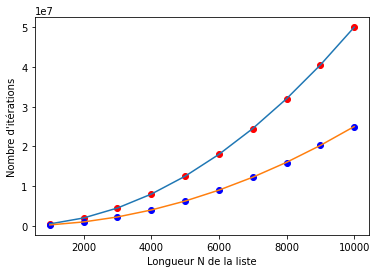
Le tri intégré dans Python n'apparait plus car il ne renvoie pas le nombre d'itérations. Cette fois, on obtient le résultat attendu : **le tri par insertion (en bleu) est en moyenne 2 fois plus rapide que le tri par sélection (en rouge)**, le facteur 2 étant **confirmé par les coefficients de la modélisation** (on retrouve même le résultat exact, à savoir  $y=N^2/2$ pour le tri par sélection et $y=N^2/4$ pour le tri par insertion).

**BONUS**

> On peut pousser plus loin la comparaison en regardant ce qu'on obtient **dans le pire (liste triée par ordre décroissant) et dans le meilleur (liste déjà triée par ordre croissant) des cas**.
> - Dans le **meilleur des cas**, on obtient ceci :
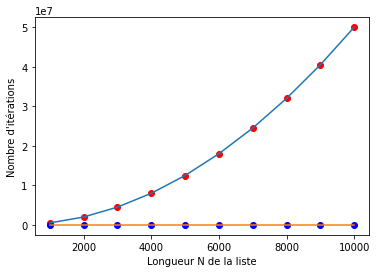
> Comme prévu, ça ne **change rien pour le tri par sélection** qui reste quadratique. Par contre, le **tri par insertion devient linéaire** et donc beaucoup plus rapide.
> - Dans le **pire des cas**, on obtient ceci :
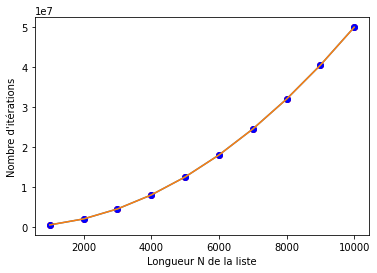
> Là encore, on obtient ce qui était prévu, les **2 algorithmes sont parfaitement équivalents** et leurs courbes sont donc parfaitement superposées (on ne voit que la deuxième qui cache la première).

## 3. Preuve de la correction

### 3.1 Tri par sélection

**L'invariant de boucle** est :  
> "A la fin de l'itération $i$, les $i+1$ premiers éléments du tableau sont triés par ordre croissant et le reste du tableau (non trié) ne contient que des valeurs supérieures ou égales à celles déjà triées".

**Q6. Montrer que cette propriété est vraie pour $i=0$, puis, que si elle est vraie pour $i=k$ alors elle est encore vraie pour $i=k+1$.**

**Réponse :**

> Pour $i=0$, la propriété s'écrit : "A la fin de l'itération $0$, le premier élément du tableau est trié et le reste du tableau ne contient que des valeurs supérieures ou égales à cette valeur". Comme à la fin de la première itération le premier élément du tableau est la valeur minimum de l'ensemble du tableau, la propriété est vraie.
>
> On suppose que la propriété est vraie à la fin de l'itération $i=k$. Les $k+1$ premiers éléments du tableau sont donc triés par ordre croissant et le reste du tableau ne contient que des valeurs supérieures ou égales à la dernière valeur triée.
>
> A la fin de l'itération suivante, on a permuté la valeur minimum du tableau non-trié avec l'élément d'indice $k+1$, c'est-à-dire le $k+2^{ème}$ élément, ou encore la première valeur du tableau non-trié. Or, on sait par hypothèse que ce nouvel élément d'indice $k+1$ est forcément supérieur aux $k+1$ premiers éléments déjà triés. Ce sont donc maintenant les $k+2$ premiers éléments qui sont triés.
>
> Quand au reste du tableau, il contient forcément des valeurs supérieures ou égales au dernier élément trié puisque c'était un minimum.
>
> Après une itération, la propriété est donc encore vraie pour $i=k+1$.

### 3.2 Tri par insertion

**L'invariant de boucle** est :  
> "A la fin de l'itération $i$, les $i+2$ premiers éléments du tableau sont triés par ordre croissant".

**Q7. Montrer que cette propriété est vraie pour $i=0$, puis, que si elle est vraie pour $i=k$ alors elle est encore vraie pour $i=k+1$.**

**Réponse :** 

> Pour $i=0$, la propriété devient : "A la fin de l'itération $0$, les 2 premiers éléments sont triés par ordre croissant". Or, à la fin de la première itération, on a permuté les 2 premières valeurs si la deuxième était plus petite que la première. Sinon, on a rien changé. Dans tous les cas, les 2 premières valeurs sont bien triées par ordre croissante et la propriété est vraie.
>
> Supposons maintenant que la propriété est vraie à la fin de l'itération $i=k$. Alors on peut dire qu'à la fin de cette itération les $k+2$ premiers éléments du tableau sont triés par ordre croissant.
>
> Lors de l'itération suivante, on permute le $k+3^{ème}$ élément avec l'élément qui est à sa gauche, jusqu'à ce que dernier soit plus petit que lui. A la fin de cette itération, ce sont donc bien les $k+3$ premiers éléments du tableau qui sont triés par ordre croissant. La propriété est donc vraie pour $i=k+1$.
